# TASK

**Hackathon Subject 3: Exploring Employee Attrition and Performance in a Corporate Environment**

Description:

In this hackathon, participants are tasked with exploring the factors that contribute to employee attrition and performance within a corporate environment. Using the “IBM HR Analytics Employee Attrition & Performance” dataset, the objective is to conduct an in-depth analysis to uncover patterns and correlations that could help the organization better understand the causes of employee turnover. The insights gained will aid in developing strategies to improve employee satisfaction, retention, and overall performance.

This dataset allows participants to answer important questions such as how factors like distance from home, job role, and work-life balance affect attrition rates, and how variables such as education level and job satisfaction correlate with performance ratings.

Data source: IBM HR Analytics Employee Attrition & Performance

Key Tasks:

Exploratory Data Analysis (EDA):
Perform a comprehensive analysis to understand the distribution of the data and identify key trends.
Visualize the distribution of attrition across different demographic and job-related variables, such as age, gender, education, job role, and department.
Explore how employee satisfaction (e.g., JobSatisfaction, EnvironmentSatisfaction) and work-life balance influence attrition rates.

Data Preprocessing:

Handle missing data and clean the dataset to prepare it for analysis.
Encode categorical variables like JobRole, MaritalStatus, and OverTime to facilitate data exploration.
Normalize or standardize numerical features like MonthlyIncome, Age, and DistanceFromHome to ensure accurate comparisons.

Correlation and Trend Analysis:

Analyze correlations between employee attributes (e.g., Education, JobSatisfaction, WorkLifeBalance) and attrition rates.
Investigate trends in performance ratings across different job roles and departments.
Create cross-tabulations and heatmaps to visualize relationships between key variables, such as DistanceFromHome by JobRole and Attrition, or MonthlyIncome by Education and Attrition.

Visualization:

Use Matplotlib and Seaborn to create insightful visualizations that effectively communicate the findings. Examples include bar plots, box plots, and heatmaps. Or you can directly create them with Tableau or PowerBI.
Create an interactive dashboard using Tableau or PowerBI to allow for dynamic exploration of the data and insights.

Bonus: Retention Strategy Development:

Based on the analysis, propose actionable strategies to reduce employee attrition. Consider factors such as improving job satisfaction, enhancing work-life balance, and providing targeted support to high-risk groups.
Deliverables:

Participants are expected to submit a comprehensive report detailing their exploratory data analysis, data preprocessing steps, and key findings. Additionally, a presentation should be prepared to showcase visualizations and offer recommendations based on the insights. An interactive dashboard is optional but can enhance the presentation of results.

Evaluation Criteria:

Judges will assess submissions based on the depth of analysis, creativity in exploring correlations and trends, the clarity and effectiveness of visualizations, and the practicality and impact of the recommendations for reducing employee attrition and enhancing performance.



**As stated on the IBM website "This is a fictional data set created by IBM data scientists". Its main purpose is to demonstrate the Watson analytics tool for employee attrition. So, it's useful for testing your own models that require employee data, but useless for drawing any real world conclusions!**

# Loading the file with Kaggle API

It would be easier for others to see rather than uploading it to my local google drive

In [2]:
# LOADING THE DATASET using Kaggle API

from google.colab import files

# Upload the kaggle.json file
files.upload()

# Create a directory for Kaggle configuration
!mkdir -p ~/.kaggle

# Move the kaggle.json file to the directory
!cp kaggle.json ~/.kaggle/

# Change permissions to read and write for the owner
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets list #Verify the setup by checking your Kaggle API credentials



Saving kaggle.json to kaggle.json
ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                         Student Performance Factors                          94KB  2024-09-02 10:53:57          18485        338  1.0              
abdulszz/spotify-most-streamed-songs                            Spotify Most Streamed Songs                          60KB  2024-09-07 18:23:14           5143         65  1.0              
owm4096/laptop-prices                                           Laptop Prices                                        25KB  2024-09-09 12:43:01           5673         92  1.0              
cameronseamons/electronic-

In [3]:
!kaggle datasets download -d pavansubhasht/ibm-hr-analytics-attrition-dataset


Dataset URL: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
License(s): DbCL-1.0
  0% 0.00/50.1k [00:00<?, ?B/s]
100% 50.1k/50.1k [00:00<00:00, 1.49MB/s]


In [4]:

!unzip ibm-hr-analytics-attrition-dataset.zip


Archive:  ibm-hr-analytics-attrition-dataset.zip
  inflating: WA_Fn-UseC_-HR-Employee-Attrition.csv  


In [5]:
# we need to load the dataset into dataframe

import pandas as pd

# Read the dataset
file_path = 'WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)

# Display the first few rows 5 to ensure it loaded correctly
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#Data Preprocessing:

Handle missing data and clean the dataset to prepare it for analysis.

In [12]:
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_values
# THERE ARE NO MISSING VALUES

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


Bonus: I want to check for Inconsistencies in Categorical Variables - typos or inconsisteng labeling

In [13]:
# Check unique values in key categorical columns to find inconsistencies

cat_cols = df.select_dtypes(include=['object']).columns
print("\nUnique Values in Key Categorical Columns:\n")
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")



Unique Values in Key Categorical Columns:

Attrition: ['Yes' 'No']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']
Over18: ['Y']
OverTime: ['Yes' 'No']


Bonus: removing unneccesary columns:

In [14]:
# Remove irrelevant columns like EmployeeNumber, Over18, EmployeeCount, StandardHours (if consistent)
df.drop(['EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours'], axis=1, inplace=True)

# Verify the remaining columns
print("\nColumns After Cleaning:\n", df.columns)


Columns After Cleaning:
 Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


Task: Encode categorical variables like JobRole, MaritalStatus, and OverTime to facilitate data exploration.

My addition: there are more columns that should be encoded. Let's remind first 3 types of encoding:

1. Binary Encoding: Used for binary categorical variables.

2. One-Hot Encoding: Used for variables with multiple categories.

3. Label Encoding: Assigns a unique integer to each category (best for ordinal data).


In [15]:
# Step 1: Import the necessary library for encoding
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Step 2: Create a copy of the original DataFrame to keep the original intact
encoded_df = df.copy()

# Step 3: Encode Binary Categorical Variables in the new encoded DataFrame
encoded_df['Attrition'] = encoded_df['Attrition'].map({'Yes': 1, 'No': 0})
encoded_df['OverTime'] = encoded_df['OverTime'].map({'Yes': 1, 'No': 0})
encoded_df['Gender'] = encoded_df['Gender'].map({'Male': 1, 'Female': 0})

# Display the first few rows to confirm changes in the new encoded_df
print("\nBinary Encoded Columns (Attrition, OverTime, Gender):\n", encoded_df[['Attrition', 'OverTime', 'Gender']].head())

# Step 4: One-Hot Encoding for Multi-Category Categorical Variables in the new encoded DataFrame
encoded_df = pd.get_dummies(encoded_df, columns=['JobRole', 'MaritalStatus', 'Department', 'BusinessTravel', 'EducationField'], drop_first=True)

# Display the first few rows of the updated encoded DataFrame after one-hot encoding
print("\nOne-Hot Encoded Columns (JobRole, MaritalStatus, Department, etc.):\n", encoded_df.head())



Binary Encoded Columns (Attrition, OverTime, Gender):
    Attrition  OverTime  Gender
0          1         1       0
1          0         0       1
2          1         1       1
3          0         1       0
4          0         0       1

One-Hot Encoded Columns (JobRole, MaritalStatus, Department, etc.):
    Age  Attrition  DailyRate  DistanceFromHome  Education  \
0   41          1       1102                 1          2   
1   49          0        279                 8          1   
2   37          1       1373                 2          2   
3   33          0       1392                 3          4   
4   27          0        591                 2          1   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2       0          94               3         2  ...   
1                        3       1          61               2         2  ...   
2                        4       1          92               2         1  ... 

In [16]:
encoded_df.columns


Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Department_Research & Development',
       'Department_Sales', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'EducationFi

Normalize or standardize numerical features like MonthlyIncome, Age, and DistanceFromHome to ensure accurate comparisons.

**Deciding on which method to apply:**

Monthly income - I want to keep the  influence of outliers (preserve the difference between very high a low salaries) which is useful when analyzing the influence of income on employee satisfaction or performance. This relative difference is crucial for understanding the role of income in attrition. - I chose standardization.

Age - usually bound by biology, not prone to extreme outliers like monthly income in capitalistic states. Normalization will still keep relative order in place.

Distance from home - This data is right-skewed (most employees live close to work). On the flip side - higher chance of extreme outliers - people living far away. Standardization will allow us to better see if a distance is far above or below the average.

---

**NOTE TO MYSELF TO REMEMBER**

**Normalization**: Use when the data is bounded and you want to preserve relative ranking.

**Standardization**: Use when data has outliers or skewness and you want to highlight deviation from the mean.

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# lets create separate dataframes instead of altering the original one
normalized_df = encoded_df.copy()
standardized_df = encoded_df.copy()

# Columns to normalize and standardize
cols_to_normalize = ['Age']
cols_to_standardize = ['MonthlyIncome', 'DistanceFromHome']

#normalizing
scaler = MinMaxScaler()
normalized_df[cols_to_normalize] = scaler.fit_transform(normalized_df[cols_to_normalize])

# standardizing
scaler = StandardScaler()
standardized_df[cols_to_standardize] = scaler.fit_transform(standardized_df[cols_to_standardize])

# display after transformation
print("Normalized Data (Age): \n ", normalized_df[cols_to_normalize].head())
print("\nStandardized Data (MonthlyIncome, DistanceFromHome):\n", standardized_df[cols_to_standardize].head())

Normalized Data (Age): 
          Age
0  0.547619
1  0.738095
2  0.452381
3  0.357143
4  0.214286

Standardized Data (MonthlyIncome, DistanceFromHome):
    MonthlyIncome  DistanceFromHome
0      -0.108350         -1.010909
1      -0.291719         -0.147150
2      -0.937654         -0.887515
3      -0.763634         -0.764121
4      -0.644858         -0.887515


Insight: for low variability roles (where salaries are highly concentrated around certain number) like Sales Representative and Lab. Technician,  consider increasing the salary range so high performers can earn more.

Vice versa, addressing disparity in high variability roles is worth looking at. Ensure that those earning a lot do it in fair way, fair to their collegues (which affects job satisfaction of employees).

# Exploratory Data Analysis (EDA):

Perform a comprehensive analysis to understand the distribution of the data and identify key trends.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Tabular view is not the easiest to comprehend, I came to idea to visualize every column by histogram

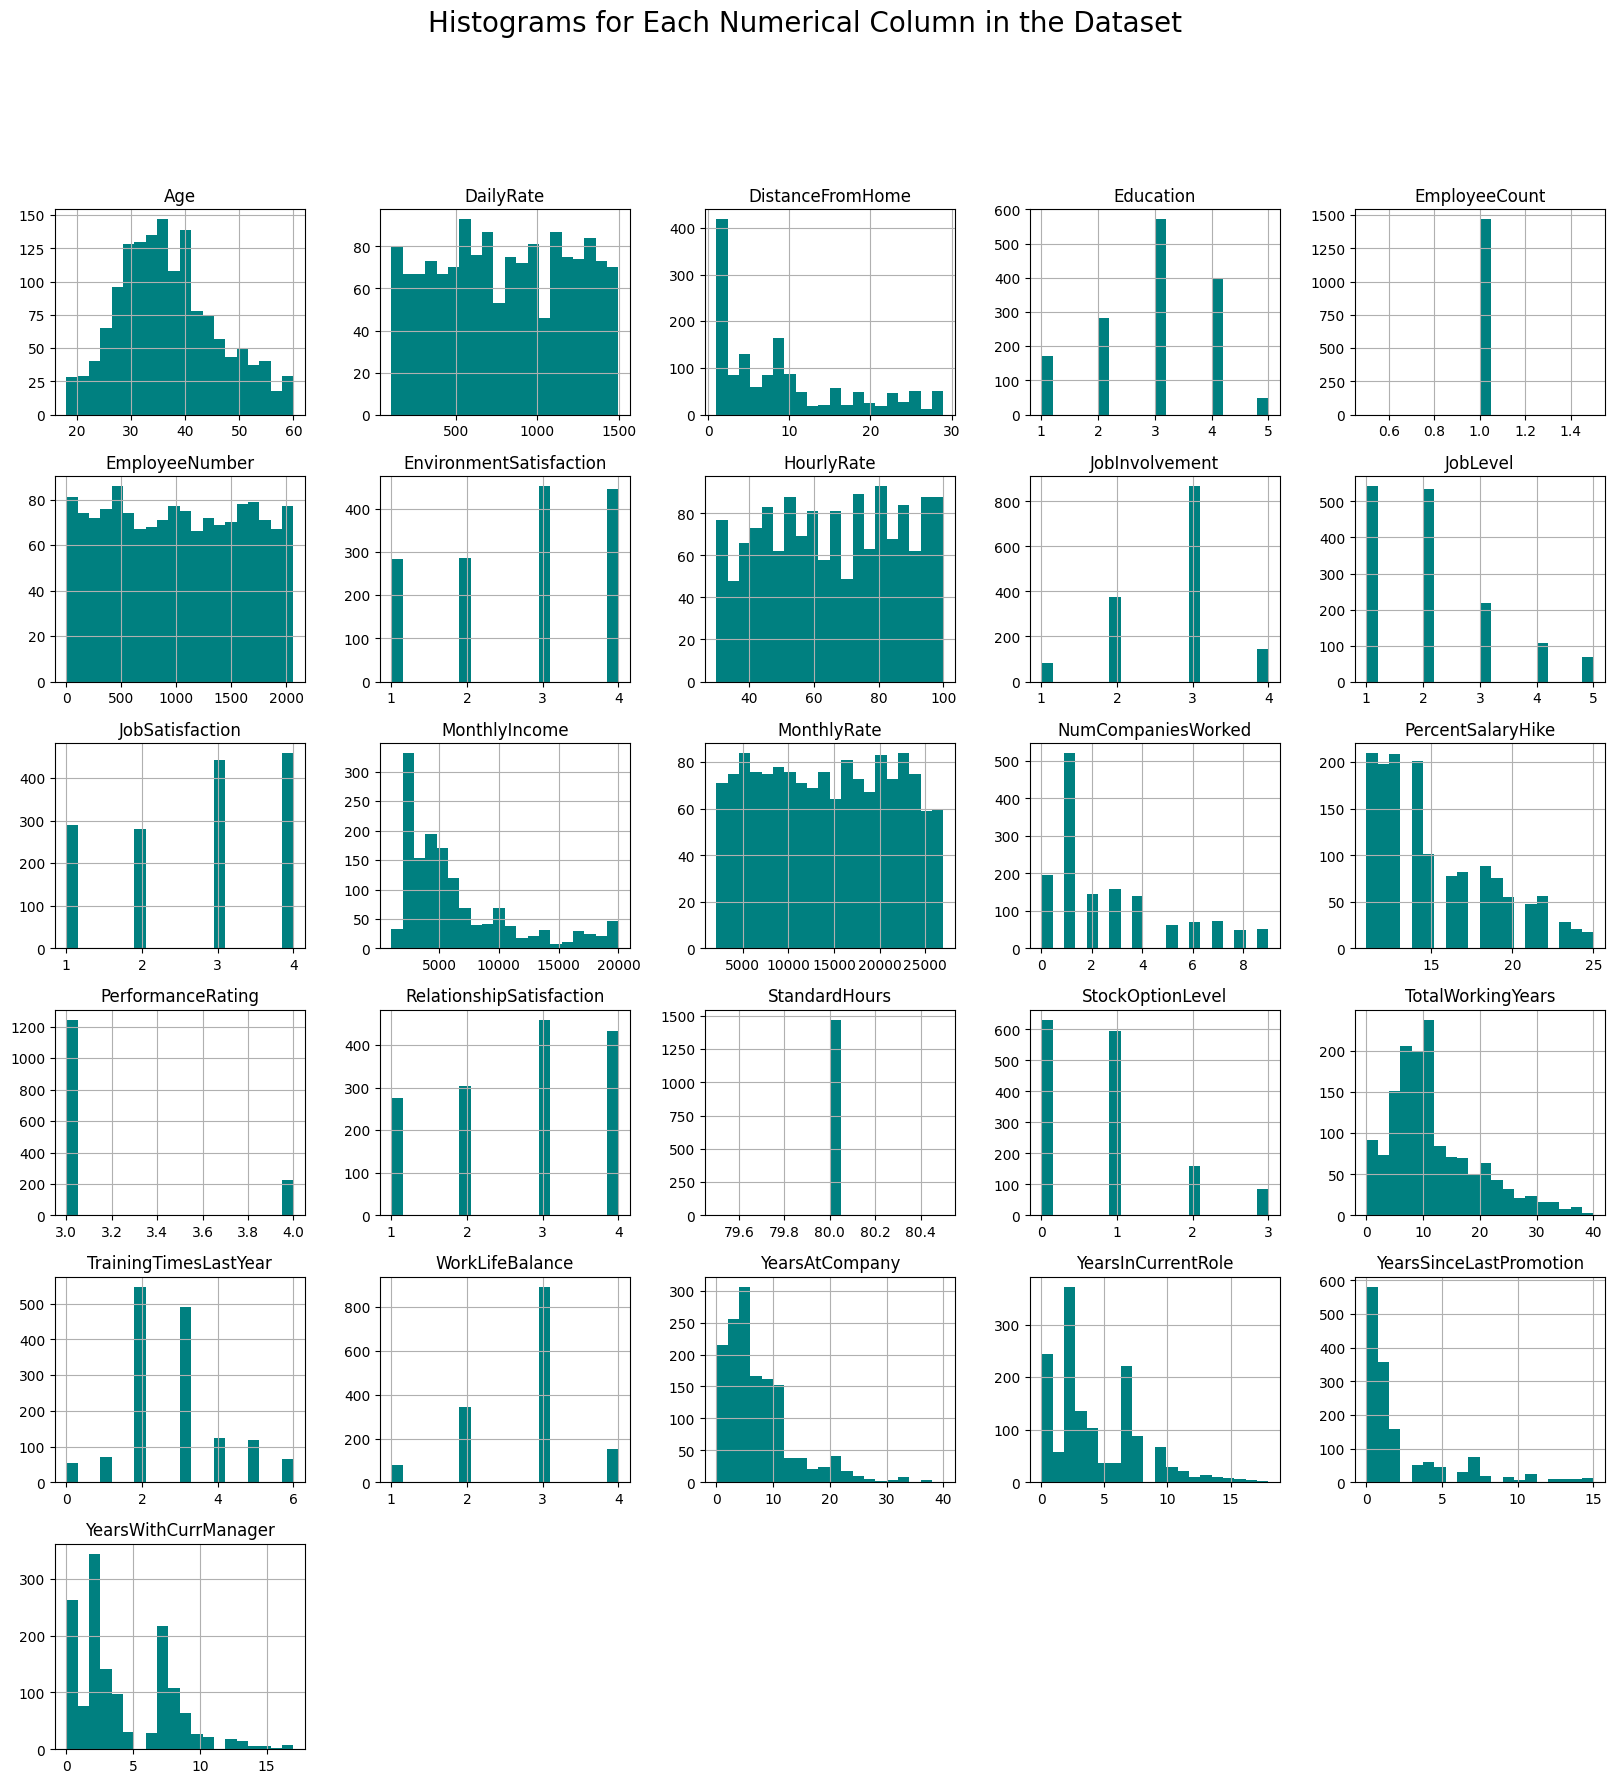

In [8]:
import matplotlib.pyplot as plt

# Create histograms for each numerical column
df.describe().columns  # This lists all numerical columns

df.hist(figsize=(20, 20), bins=20, color='teal')
plt.suptitle('Histograms for Each Numerical Column in the Dataset', fontsize=20)
plt.show()


looking at histograms and Kaggle there are few things that should be kept in mind:

1. 65% of dataset are R&D jobs - over representation in my opinion followed by 30% sales and only 4% of others.
2. 73% are in life sciences and medical field

Let's see how many employees quit already:

<ipython-input-9-52a09f5bbeda>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette='viridis')


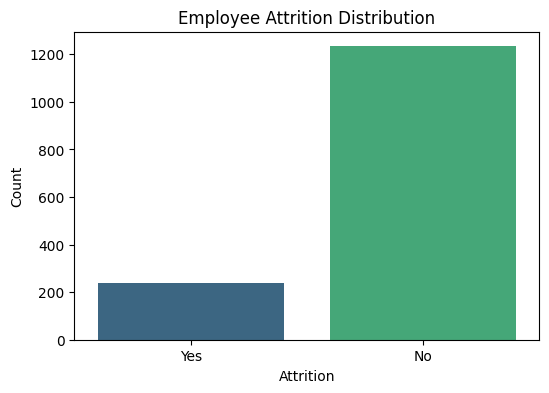

In [9]:
# Count plot for the 'Attrition' column

import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Attrition', palette='viridis')
plt.title('Employee Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()


For those who did quit, let's see how are quiters distributed across demographic variables - Age, Gender, Education, MaritalStatus, and DistanceFromHome

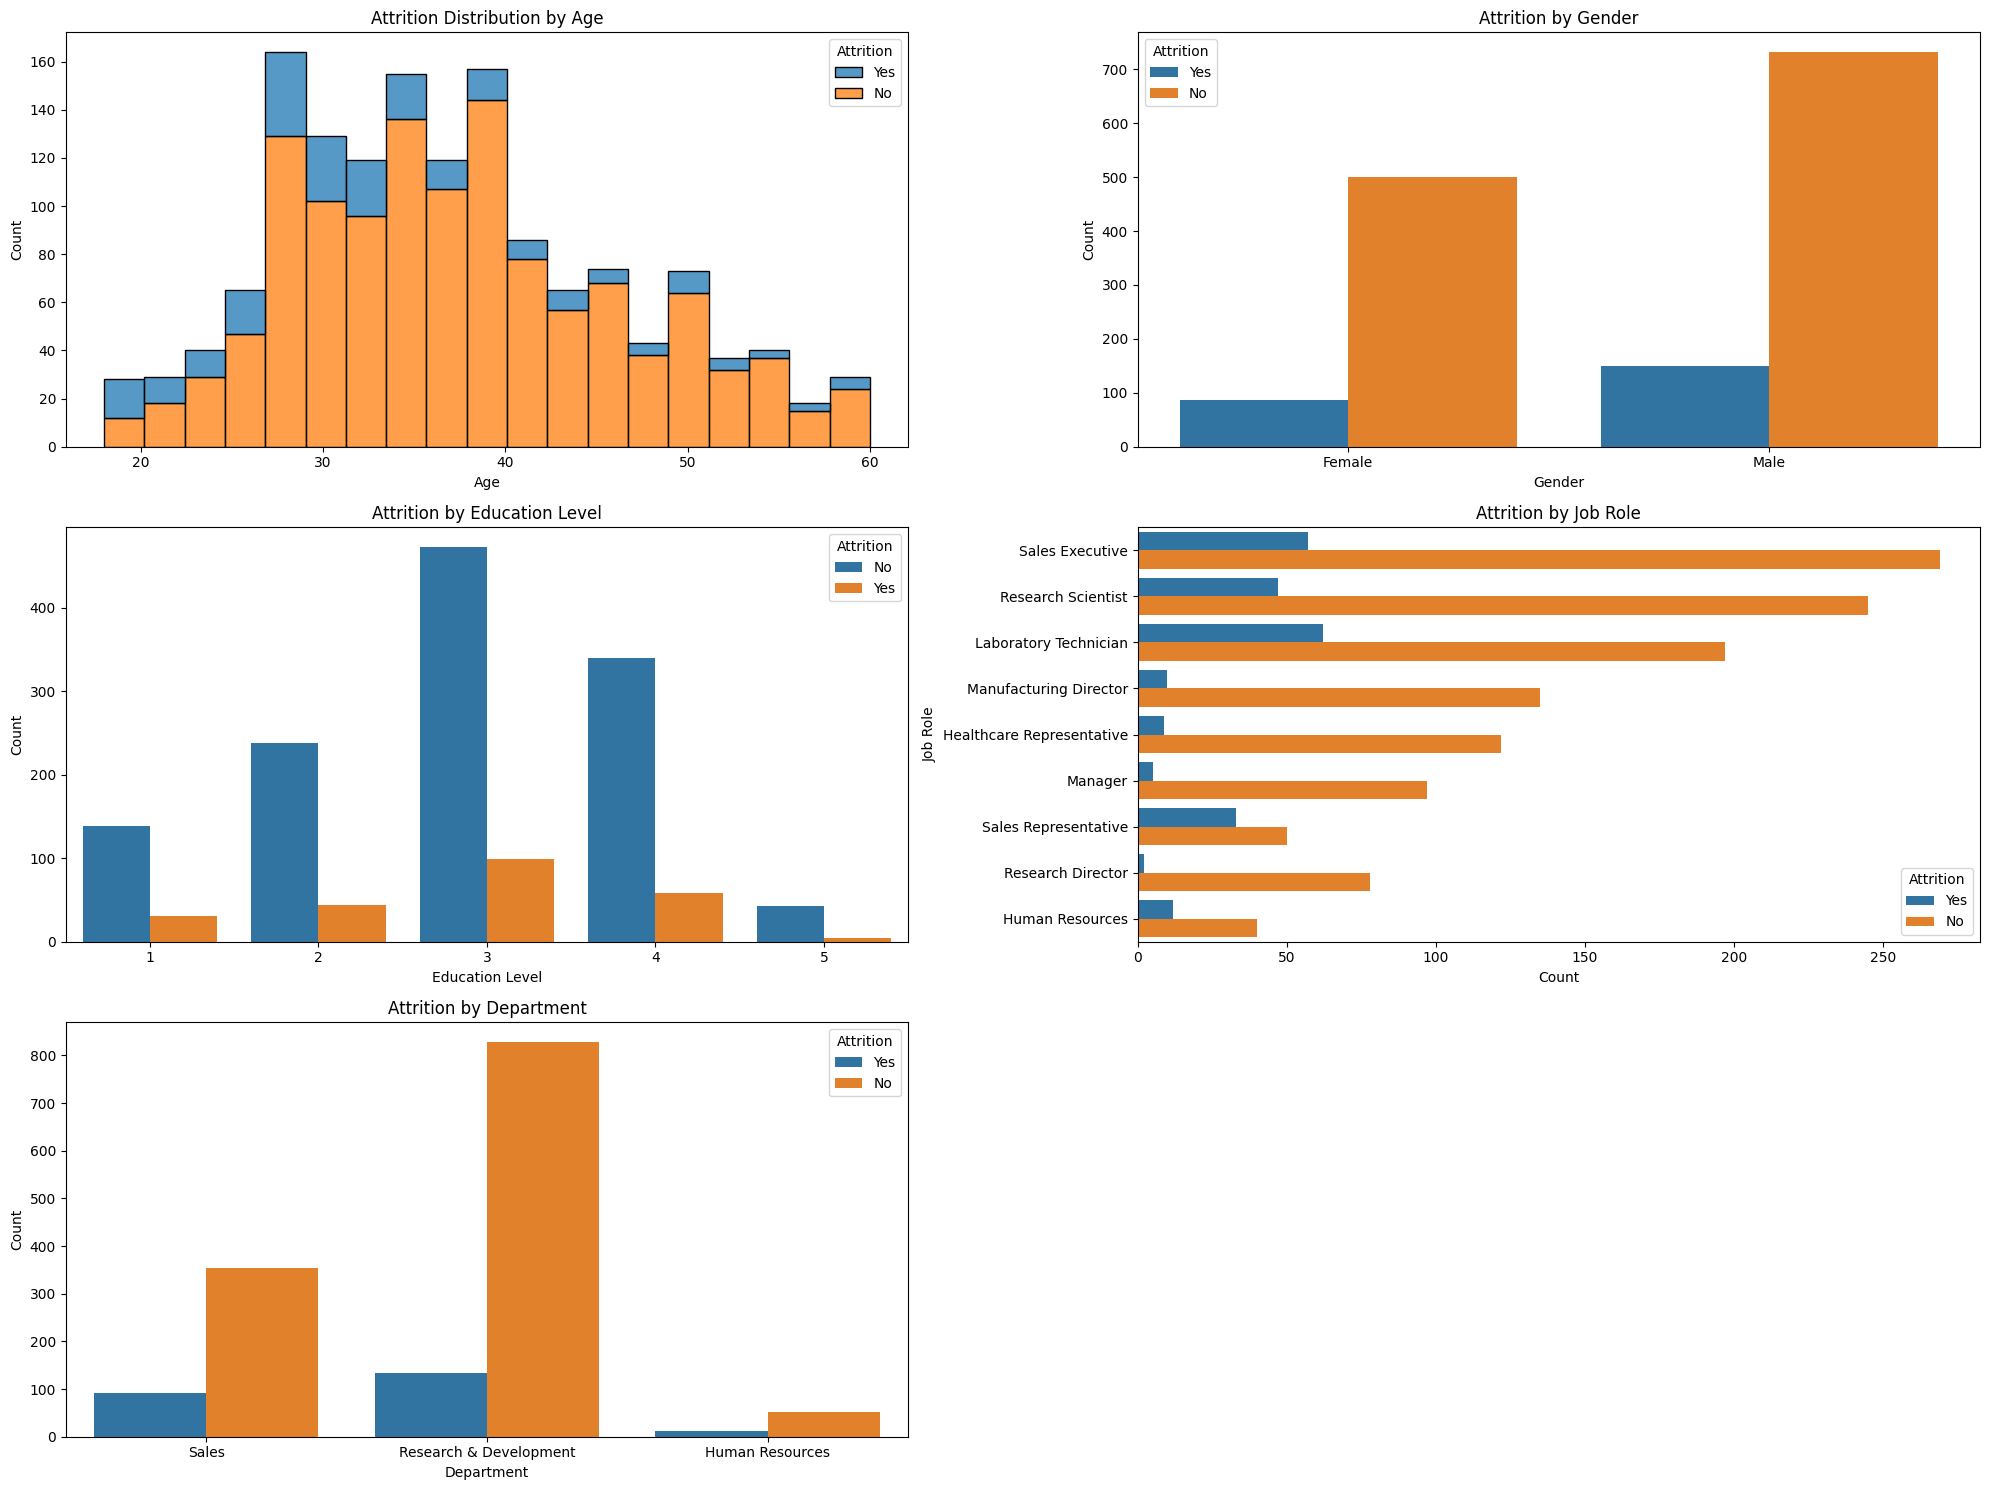

In [10]:
# Create subplots instead of creating a new plot every time
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

# Attrition Distribution by Age (Grouped)
sns.histplot(data=df, x="Age", hue="Attrition", multiple="stack", ax=axes[0, 0])
axes[0, 0].set_title('Attrition Distribution by Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# Attrition by Gender
sns.countplot(data=df, x='Gender', hue='Attrition', ax=axes[0, 1])
axes[0, 1].set_title('Attrition by Gender')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')

# Attrition by Education
sns.countplot(data=df, x='Education', hue='Attrition', ax=axes[1, 0])
axes[1, 0].set_title('Attrition by Education Level')
axes[1, 0].set_xlabel('Education Level')
axes[1, 0].set_ylabel('Count')

# Attrition by Job Role
sns.countplot(data=df, y='JobRole', hue='Attrition', ax=axes[1, 1])
axes[1, 1].set_title('Attrition by Job Role')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Job Role')

# Attrition by Department
sns.countplot(data=df, x='Department', hue='Attrition', ax=axes[2, 0])
axes[2, 0].set_title('Attrition by Department')
axes[2, 0].set_xlabel('Department')
axes[2, 0].set_ylabel('Count')

# Remove the empty subplot
fig.delaxes(axes[2, 1])

# Adjust the layout to prevent overlapping elements
fig.tight_layout()

plt.show()

**Insights**:

The graph suggests that attrition rates are generally higher among younger employees compared to older ones, which can make sense presuambly younger people are more risk taking and still exploring career options. Those who are older have more to loose by resigning and might have higher bills to pay (familly, kids, house maintainance etc).



Exploring how employee satisfaction (e.g., JobSatisfaction, EnvironmentSatisfaction) and work-life balance influence attrition rates.

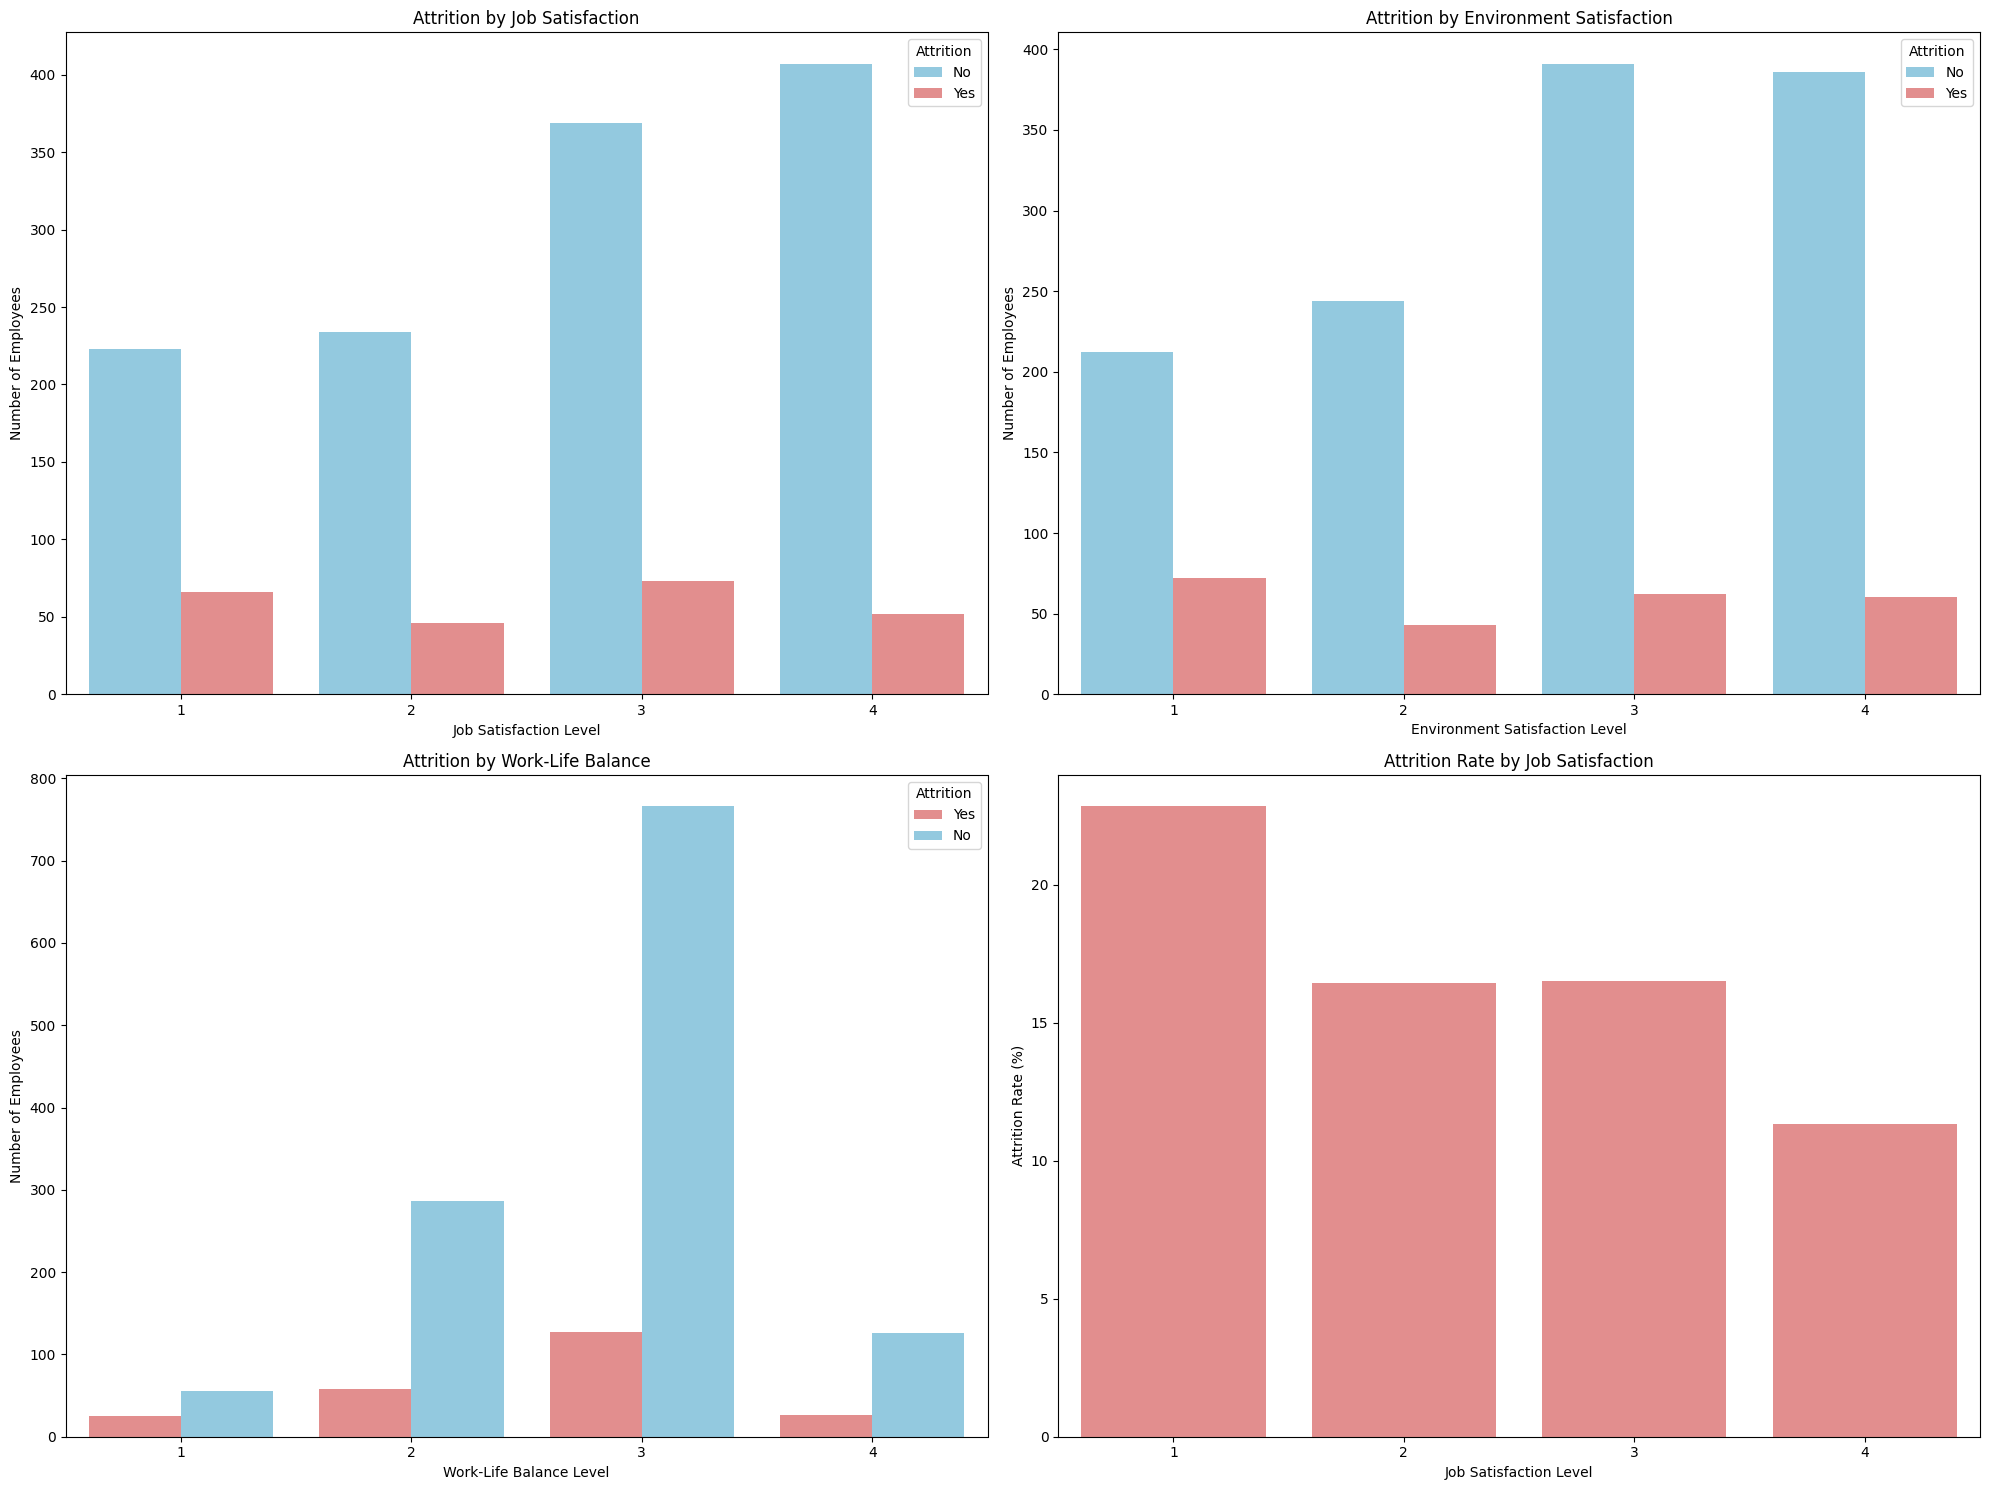

Attrition Rate by Job Satisfaction Levels:
 JobSatisfaction
1    22.837370
2    16.428571
3    16.515837
4    11.328976
Name: count, dtype: float64


In [11]:
# Define a consistent color palette for Attrition
attrition_palette = {"No": "skyblue", "Yes": "lightcoral"}

# Create subplots instead of showing plot by plot
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Job Satisfaction vs Attrition with consistent color palette
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition', palette=attrition_palette, ax=axes[0, 0])
axes[0, 0].set_title('Attrition by Job Satisfaction')
axes[0, 0].set_xlabel('Job Satisfaction Level')
axes[0, 0].set_ylabel('Number of Employees')

# Environment Satisfaction vs Attrition with consistent color palette
sns.countplot(data=df, x='EnvironmentSatisfaction', hue='Attrition', palette=attrition_palette, ax=axes[0, 1])
axes[0, 1].set_title('Attrition by Environment Satisfaction')
axes[0, 1].set_xlabel('Environment Satisfaction Level')
axes[0, 1].set_ylabel('Number of Employees')

# Work-Life Balance vs Attrition with consistent color palette
sns.countplot(data=df, x='WorkLifeBalance', hue='Attrition', palette=attrition_palette, ax=axes[1, 0])
axes[1, 0].set_title('Attrition by Work-Life Balance')
axes[1, 0].set_xlabel('Work-Life Balance Level')
axes[1, 0].set_ylabel('Number of Employees')

# Calculate Attrition Rates for Each Satisfaction Metric and display with consistent colors
def calculate_attrition_rate(column):
    # Calculate the percentage of employees who left for each category in the given column
    attrition_rate = df[df['Attrition'] == 'Yes'][column].value_counts() / df[column].value_counts() * 100
    return attrition_rate.sort_index()

# Attrition Rate by Job Satisfaction with consistent colors
job_satisfaction_attrition_rate = calculate_attrition_rate('JobSatisfaction')
sns.barplot(x=job_satisfaction_attrition_rate.index, y=job_satisfaction_attrition_rate.values, color='lightcoral', ax=axes[1, 1])
axes[1, 1].set_title('Attrition Rate by Job Satisfaction')
axes[1, 1].set_xlabel('Job Satisfaction Level')
axes[1, 1].set_ylabel('Attrition Rate (%)')

# Adjust the layout to prevent overlapping elements
fig.tight_layout()

plt.show()

# Display the calculated attrition rates for deeper insights
print("Attrition Rate by Job Satisfaction Levels:\n", job_satisfaction_attrition_rate)


Insights: higher job satisfaction level can be connected to fewer attritions percentage wise. The same is applicable to work environment satisfaction level of workers.

Scatter plots are not suitable here since we need 2 continious values. We only have discrete values (1-4)

Let's create a heatmap which will combine two measured satisfactions (every possible combination of those 2 satisfactions that are basicaly numbers 1-4) and for every possible combination calculate attrition rate (percentage of employees left for that combination group) and plot it on heatmap.

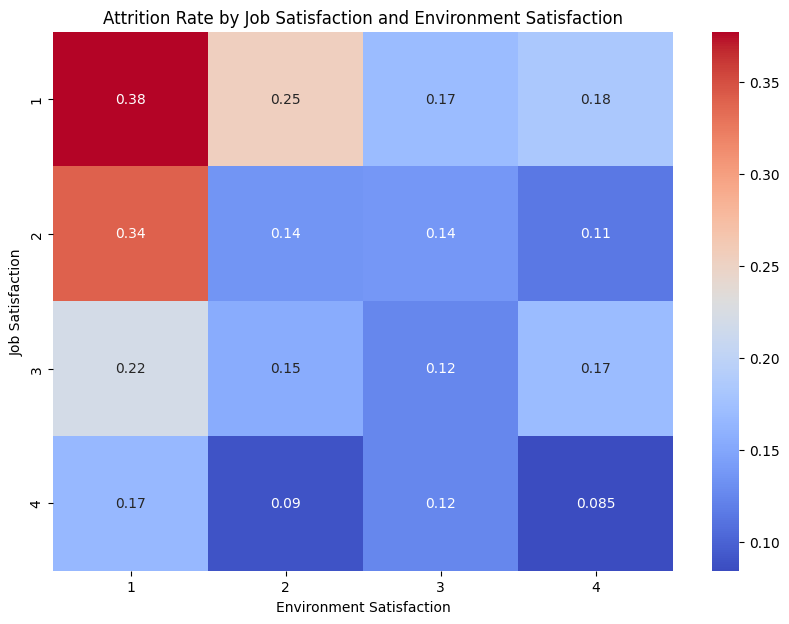

In [35]:
# Calculate attrition rates for combinations of Job Satisfaction and Environment Satisfaction
heatmap_data = pd.crosstab(index=df['JobSatisfaction'], columns=df['EnvironmentSatisfaction'],
                           values=(df['Attrition'] == 'Yes').astype(int), aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True)
plt.title('Attrition Rate by Job Satisfaction and Environment Satisfaction')
plt.xlabel('Environment Satisfaction')
plt.ylabel('Job Satisfaction')
plt.show()


Insights: we can see that employees who were the least satisfied (with their job and work environment as well) have the highest attrition rate of 38% (0.38). And the opposite is true as well - people who are most satisfied tend to have the lowest attrition rate.

We might see clues that environment satisfaction is more important to people than job satisfaction (by comparing the cells B1 and A2). An improvement in environment satisfaction dropped the attrition rate by 14% while an increase in job satisfaction lowered the attrition rate by only 5%.

Advice for companies - invest in environment satisfaction more than in job satisfaction.

Let's explore how monthly income and age vary across satisfaction levels (and attrition)

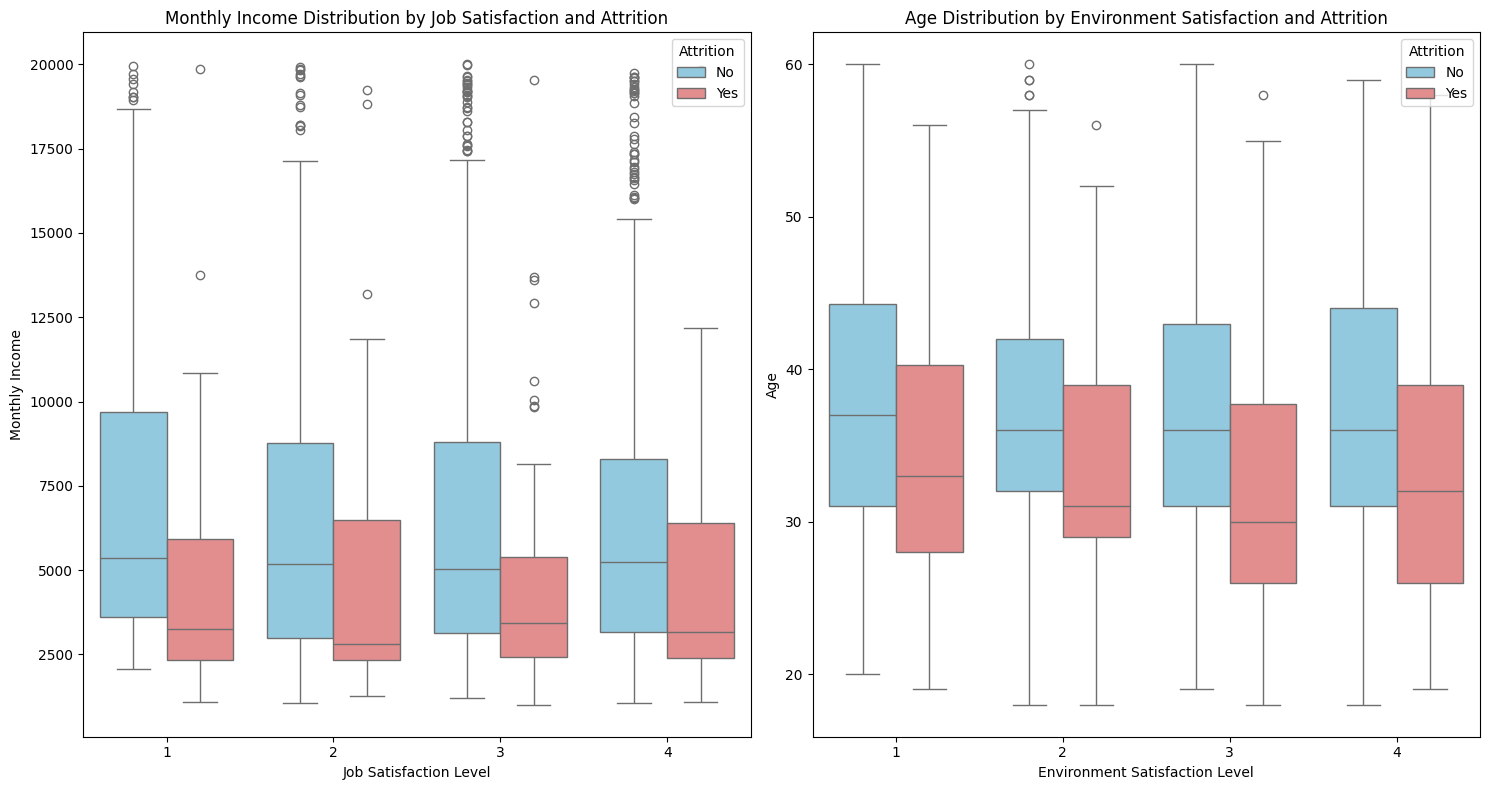

In [37]:
import seaborn as sns

# Set the figure size for the plots
plt.figure(figsize=(15, 8))

# Grouped Box Plot for Monthly Income by Job Satisfaction and hue = Attrition
plt.subplot(1, 2, 1)
sns.boxplot(x='JobSatisfaction', y='MonthlyIncome', hue='Attrition', data=df, palette={"No": "skyblue", "Yes": "lightcoral"})
plt.title('Monthly Income Distribution by Job Satisfaction and Attrition')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Monthly Income')
plt.legend(title='Attrition', loc='upper right')

# Grouped Box Plot for Age by Environment Satisfaction and hue = Attrition
plt.subplot(1, 2, 2)
sns.boxplot(x='EnvironmentSatisfaction', y='Age', hue='Attrition', data=df, palette={"No": "skyblue", "Yes": "lightcoral"})
plt.title('Age Distribution by Environment Satisfaction and Attrition')
plt.xlabel('Environment Satisfaction Level')
plt.ylabel('Age')
plt.legend(title='Attrition', loc='upper right')

# Display the plots
plt.tight_layout()
plt.show()


Insights:

Employees who left (Yes, red boxes) have a much lower median income compared to those who stayed (No, blue boxes). The median income for leavers is around $2,800, while for those who stayed, it’s closer to $5,000.

Median age of people who leave the company is lower than median age of those who stay.

Let's use violin plot which shows us more things compared to box plot, sort of improved version of boxplot (showing KDE as well)

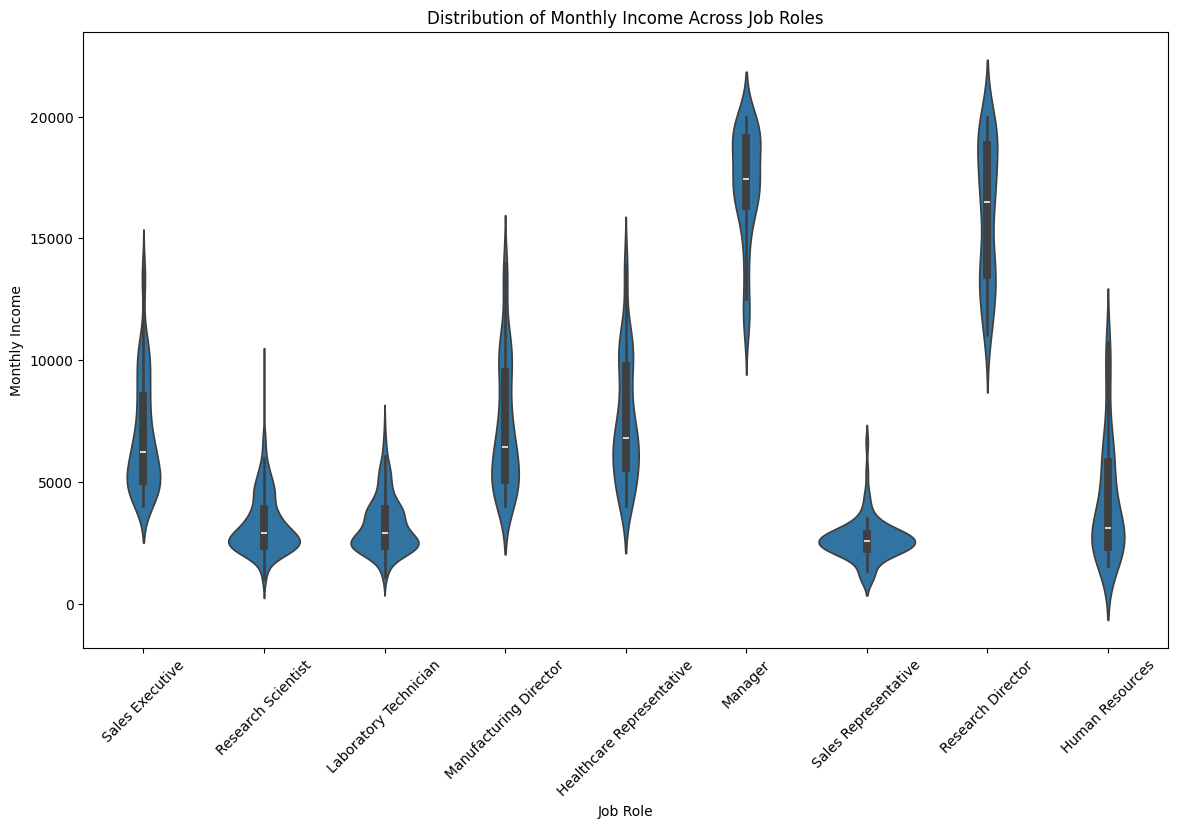

In [43]:

# A violin plot for MonthlyIncome across different Job Roles
plt.figure(figsize=(14, 8))
sns.violinplot(x='JobRole', y='MonthlyIncome', data=df)
plt.title('Distribution of Monthly Income Across Job Roles')
plt.xticks(rotation=45)
plt.xlabel('Job Role')
plt.ylabel('Monthly Income')
plt.show()


#Correlation and Trend Analysis:

Analyze correlations between employee attributes (e.g., Education, JobSatisfaction, WorkLifeBalance) and attrition rates. - ALREADY EXPLORED IN THIS CELL - https://colab.research.google.com/drive/1GiYEMXuZ5zAUNL4aRZtIio0yfAQDmfx1?authuser=1#scrollTo=XLYGA7XsoXYR&line=1&uniqifier=1

Investigate trends in performance ratings across different job roles and departments.

So we assume that 1 is low and 4 is excelent performance rating.

In [18]:
# Step 1: Understand the Performance Rating Distribution
print(df['PerformanceRating'].unique())

[3 4]


In [19]:
print(encoded_df.columns)
# we can't use encoded data frame since we performed one hot encoding on JobRole column

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Department_Research & Development',
       'Department_Sales', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'EducationFi

Lets visualize performance raiting by job role
Then we will do the same by department.

<ipython-input-20-ca42d7f4cb18>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='JobRole', y='PerformanceRating', data=avg_performance_by_role, palette='viridis')


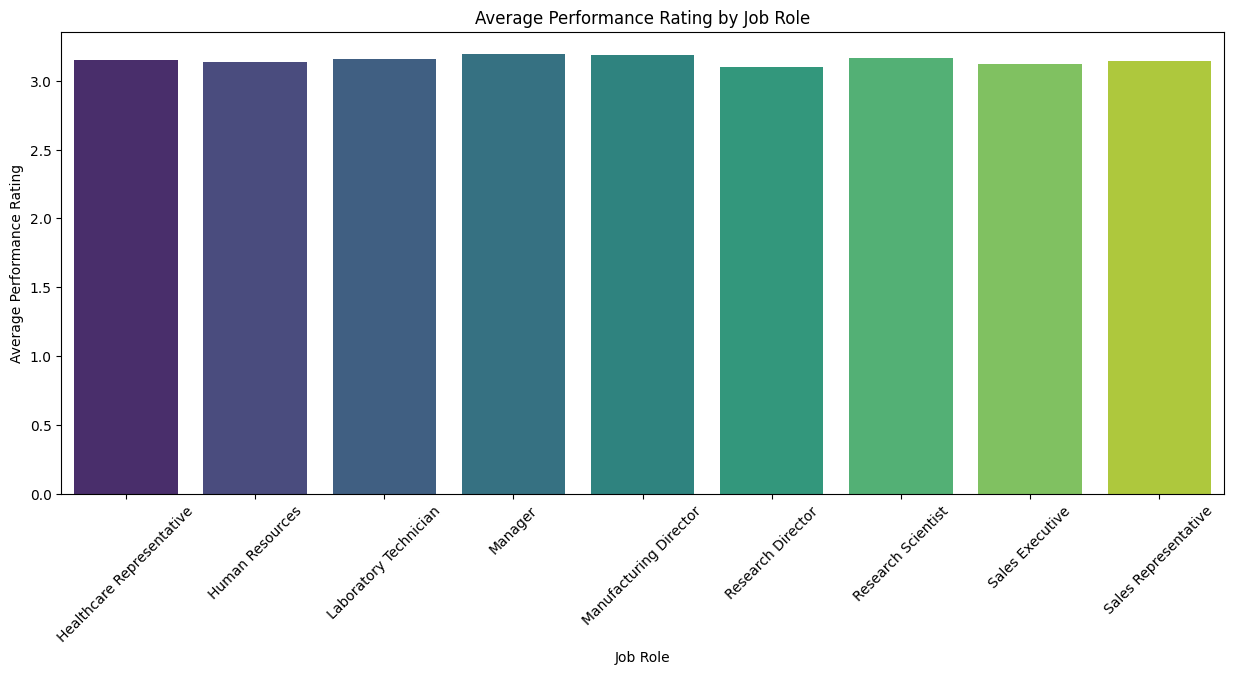

In [20]:
# Average Performance Rating by Job Role
avg_performance_by_role = df.groupby('JobRole')['PerformanceRating'].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(x='JobRole', y='PerformanceRating', data=avg_performance_by_role, palette='viridis')
plt.title('Average Performance Rating by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Average Performance Rating')
plt.xticks(rotation=45)
plt.show()


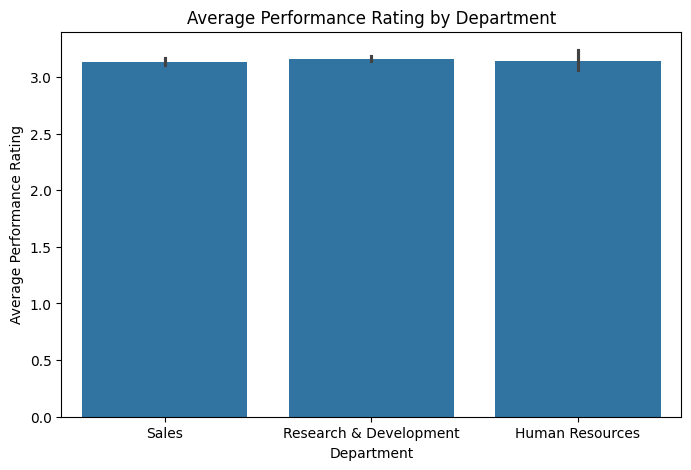

In [21]:
# Performance by rating department

plt.figure(figsize = (8,5))
sns.barplot( x = 'Department', y = 'PerformanceRating', data = df)
plt.title('Average Performance Rating by Department')
plt.xlabel('Department')
plt.ylabel('Average Performance Rating')
plt.show()

We can not derive any conclusion regarding this task from this mock dataset unfourtounately. We can't see if ceratin role constanly overperforming or if certain department is constantly overperforming others.

Even plotting out how many % of workers got 3 / 4 on performance, doesn't help us a lot since we have only 2 marks. We need more diverse data.

However, we can use pivot table (as we'd do in Excel) to check if certain job roles perform differently in dofferent company departments.


In [22]:
pivot_table = df.pivot_table(values='PerformanceRating', index='JobRole', columns='Department', aggfunc='mean')
print(pivot_table)

Department                 Human Resources  Research & Development     Sales
JobRole                                                                     
Healthcare Representative              NaN                3.152672       NaN
Human Resources                   3.134615                     NaN       NaN
Laboratory Technician                  NaN                3.162162       NaN
Manager                           3.181818                3.185185  3.216216
Manufacturing Director                 NaN                3.186207       NaN
Research Director                      NaN                3.100000       NaN
Research Scientist                     NaN                3.167808       NaN
Sales Executive                        NaN                     NaN  3.125767
Sales Representative                   NaN                     NaN  3.144578


We can see that managers of sales department slightly outperform their collegues in other 2 departments. However the differce does not seem statistically significat to draw conculsions upon.

A visualy more appealing way to presen this is heatmap.

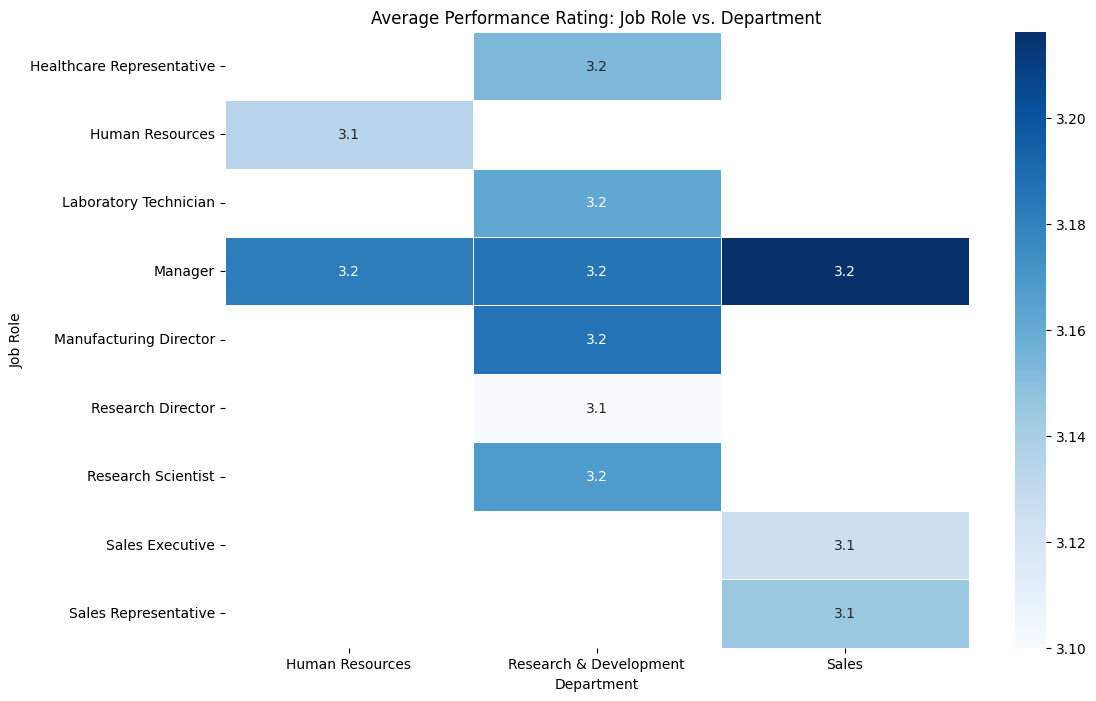

In [23]:
# Plot a heatmap for Job Role vs. Department Performance
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Average Performance Rating: Job Role vs. Department')
plt.xlabel('Department')
plt.ylabel('Job Role')
plt.show()

Create cross-tabulations and heatmaps to visualize relationships between key variables, such as DistanceFromHome by JobRole and Attrition, or MonthlyIncome by Education and Attrition.

Cross-tabulation table showing the average distance (DistanceFromHome) for each combination of JobRole and Attrition.
This tells us if certain job roles have a higher tendency for employees living far from the office to leave.

In [24]:
crosstab_distance = pd.crosstab(index=df['JobRole'],
                                columns=df['Attrition'],
                                values=df['DistanceFromHome'],
                                aggfunc='mean').fillna(0)

print(crosstab_distance)

Attrition                        No        Yes
JobRole                                       
Healthcare Representative  9.204918  17.666667
Human Resources            6.600000  13.416667
Laboratory Technician      9.329949   9.661290
Manager                    7.927835  10.000000
Manufacturing Director     9.533333   8.800000
Research Director          8.474359   7.000000
Research Scientist         8.869388   9.765957
Sales Executive            9.026022  12.649123
Sales Representative       9.000000   8.151515


Let's visualize the findings with heatmap

<function matplotlib.pyplot.show(close=None, block=None)>

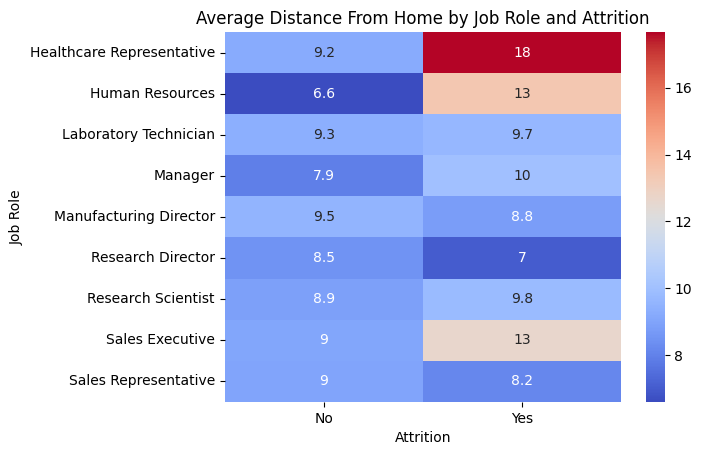

In [26]:
plt.figure()
sns.heatmap(crosstab_distance, annot = True, cmap = 'coolwarm')
plt.title('Average Distance From Home by Job Role and Attrition')
plt.xlabel('Attrition')
plt.ylabel('Job Role')
plt.show

Interpretation: there might be some correlatio between average distance from home and attrition

now lets create cross tabulation for monthly income by education and attrition. Does higher income reduce probability of attrition?

In [27]:
crosstab_income = pd.crosstab(index=df['Education'],
                              columns=df['Attrition'],
                              values=df['MonthlyIncome'],
                              aggfunc='mean').fillna(0)

print(crosstab_income)

Attrition           No          Yes
Education                          
1          5926.129496  4360.161290
2          6586.058824  4282.545455
3          6882.919662  4770.242424
4          7087.814706  5335.155172
5          8559.906977  5850.200000


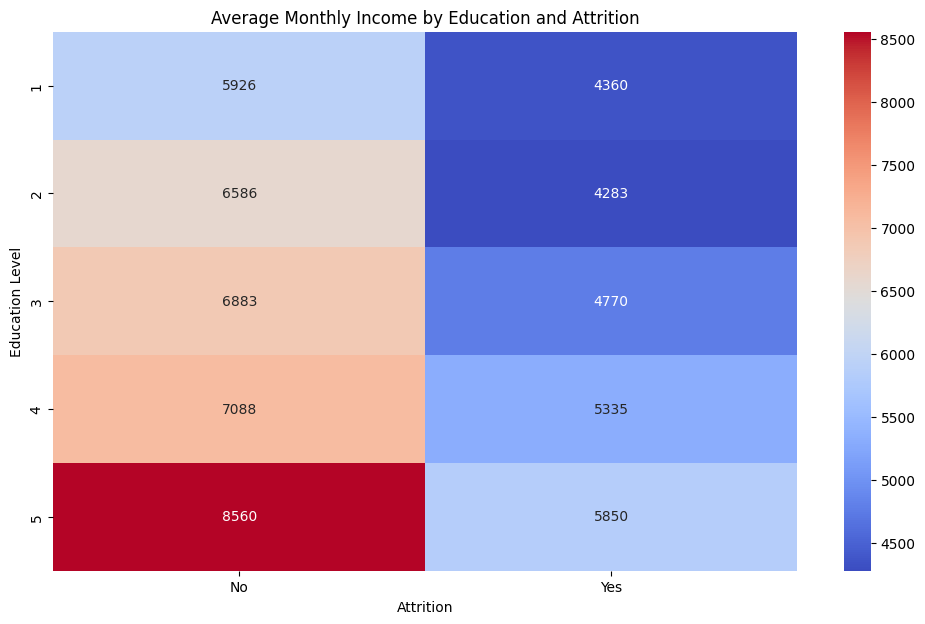

In [34]:
plt.figure(figsize=(12, 7))
sns.heatmap(crosstab_income, annot=True, fmt='.0f', cmap='coolwarm')  # Use fmt='.0f' for rounded floating-point numbers
plt.title('Average Monthly Income by Education and Attrition')
plt.xlabel('Attrition')
plt.ylabel('Education Level')
plt.show()


Interpretation: Education level is correlated to average monthly income.
Additionally, when we take people of same education level and divide them in two groups (those who resigned and not) - people who resigned do indeed have lower income compared to their peers of same education level. This leads to conclusio that higher income reduces the change for employee attrition.

# Bonus: Retention Strategy Development:

Insights can be found in this notebook next to many charts. This chapter is reserved for high-level recommendations.

High attrition rates are often correlated with low job satisfaction levels. Enhancing employee satisfaction should be a top priority. Develop strategies with HR team to receive genuine employer feedback and ways to improve satisfaction of workers.
Consider things like:
- regular employee feedback surveys
- personalized career plans for every employee so he/she can try to develop inside of company and not search for opportunities elsewhere
- review your recognition and rewards program
- fit job roles to people's skills and interests - constantly reasses
